# Predicting Heart Disease Using Machine Learning.
Building Machine Learning Model Capable of Predicting Whether or not Someone Has Heart Disease Based On Their Medical Attributes.

Take That Following Approch :
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimantation

## 1. Problem Defination
In a statement,
> Given Clinical Parameters about a Patient, can we predict whether or not they have heart disease ?

## 2. Data
Use Kaggle DataSet : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation
> trying to make Best Model

## 4. Features

**Attribute Information**

**Create Data dictionary**

1. age - Age in years
2. sex - (1 = Male, 0 = Female)
3. cp - chest pain type (4 Values)
     * 0: typical angina : chest pain related decrease blood supply to the heart
     * 1: atypical angina : chest pain not related to heart
     * 2: Non-anginal pain : typically esophageal spasms (not heart related)
     * 3: asymptomatic : chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically causes for concern
5. chol - serum cholestoral in mg/dl
     * serum = LDL + HDL +.2*triglycerides
     * above 200 is cause for concern
6. fbs - (fasting blood suger > 120 mg/dl) (1 = true , 0 = false)
     * '>126' mg/dl signals diabetes
7. restecg - resting electrocardiographic results (values 0,1,2)
     * 0: nothing to note
     * 1: ST-T Wave abnormality
       * can range from mild symptoms to server problems
       * signals non-normal heart beat
     * 2: possible or definite left ventriculer hypertrophy
       * enlarged hearts main pumping chember
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes , 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping : better heart rate with exercise (uncommon)
    * 1: Flatsloping : minimal change (typical healthy heart rate)
    * 2: Downsloping : signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourospoy
    * colored vessel means the doctor can see blood passing through
    * the more blood movement the better(no clots)
13. thal - thalium stress result
     * 0 = normal
     * 1 = fixed defect : used to be defect but ok now
     * 2 = reversable defect : no proper blood movement when exercising
14. target - have heart disease or not (1=yes , 0=no) (Predicted Attribute)

# Preparing the tools
Use Pandas, Matplotlib And Numpy for Data Analysis And Manipulation

In [4]:
# Import All Needed Tools

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to appear plots inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## Load Data

In [5]:
df = pd.read_csv('Data/heart-disease.csv')
df.shape # (rows and columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter on the dataset working with.
1. what questions are you trying to solve ?
2. what kind of data do we have and how do we treat different types ?
3. whats missing from the data and how to deal with it ?
4. where are the outliers and why should you care about them ?
5. how can you add , change or remove features to get out more out of your data ?

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Lets find out how many of each class there
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

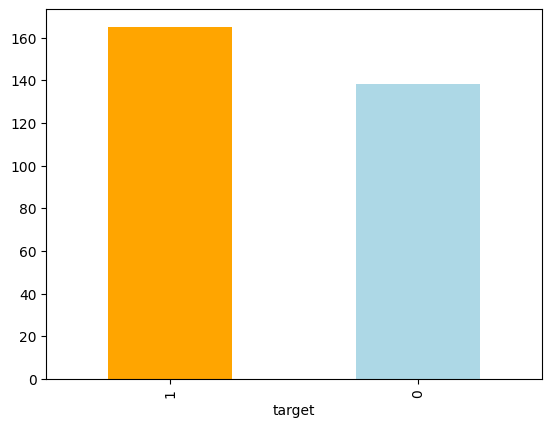

In [8]:
df['target'].value_counts().plot(kind='bar',color = ['orange','lightblue'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency According to Sex

In [12]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# compare target column with sex column
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


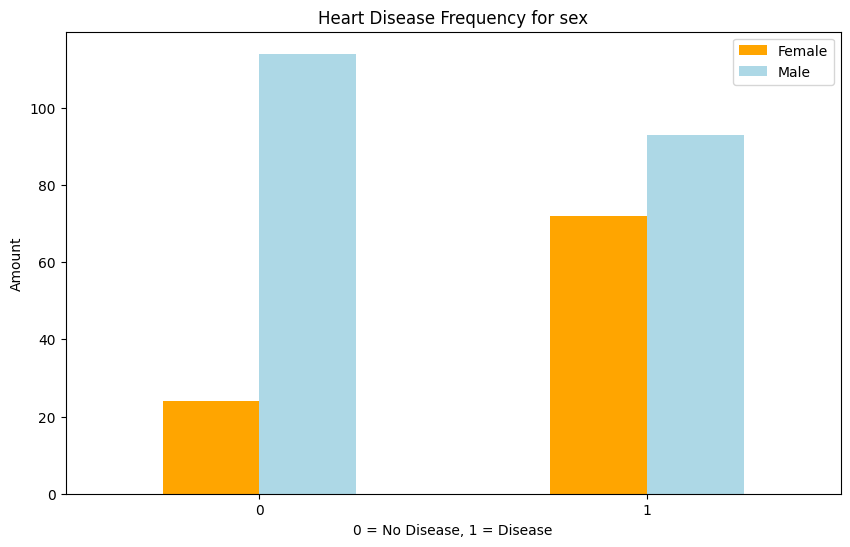

In [14]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize = (10,6),
                                    color = ['orange','lightblue'])
plt.title('Heart Disease Frequency for sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);         

### age vs max heart heart rate for heart disease

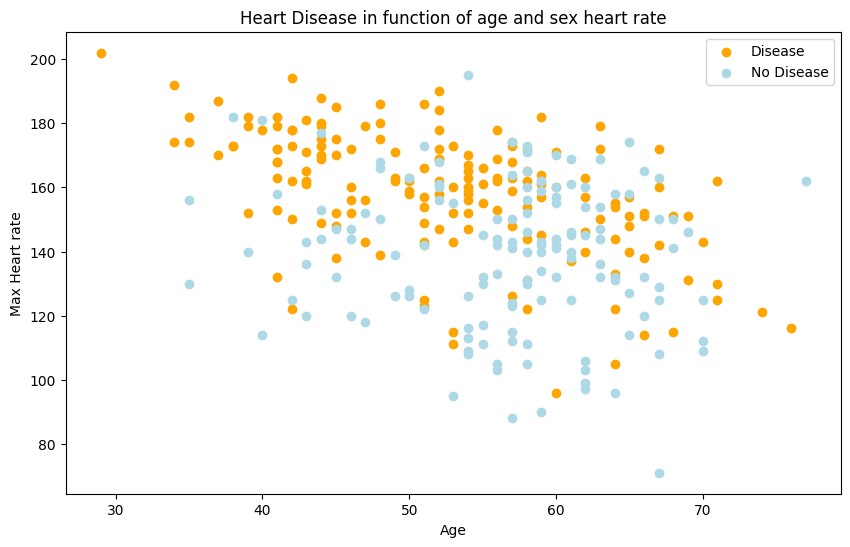

In [15]:
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color = 'orange')

# scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

# add some heplful info
plt.title('Heart Disease in function of age and sex heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart rate')
plt.legend(['Disease','No Disease']);

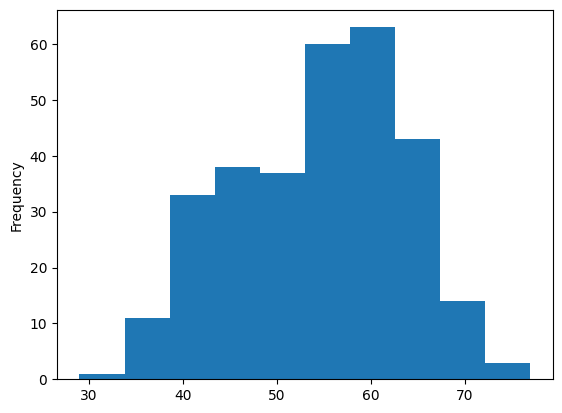

In [16]:
# Check the distribution of the age column with histogram
df.age.plot.hist();

### Heart Disease Frequency per chest pain type

cp - chest pain type (4 Values)
* 0: typical angina : chest pain related decrease blood supply to the heart
* 1: atypical angina : chest pain not related to heart
* 2: Non-anginal pain : typically esophageal spasms (not heart related)
* 3: asymptomatic : chest pain not showing signs of disease


In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


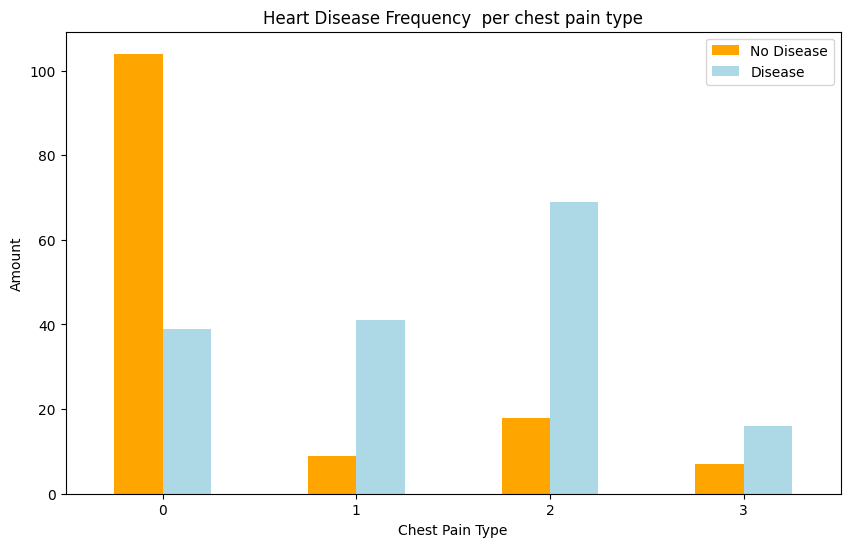

In [18]:
# make crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['orange','lightblue'])
# add some communication
plt.title('Heart Disease Frequency  per chest pain type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);


In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

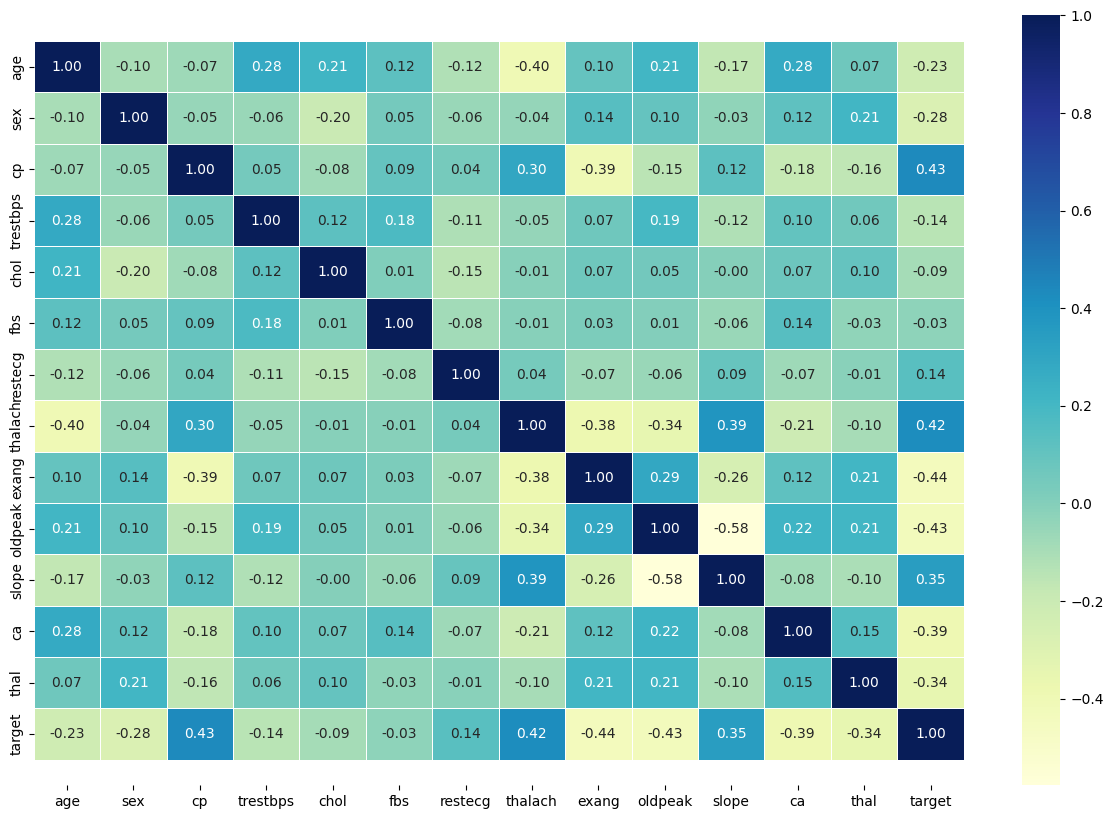

In [21]:
# make visualize correlation matrix
corr_matrix = df.corr()
fig , ax =plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix ,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap = 'YlGnBu');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 5. Modelling

In [22]:
# split data into x and y
x = df.drop('target',axis=1)
y = df['target']

# split data into train and test sets
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [23]:
len(x_train),len(x_test),len(y_train),len(y_test) # it takes 80% Data for training And 20% for testing

(242, 61, 242, 61)

### Building Machine Leraning Model
* Finding The Patterns on the Traning Set
* Use The Patterns on the test Set.
  
Trying 3 Different Machine Learning Models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [24]:
# Put Models in a dictionary
models = {'Logistic Regression' : LogisticRegression(max_iter=3000),
          'K-Nearest Neighbours Classifier' : KNeighborsClassifier(),
          'Random Forest Classifier' : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    '''
    fits and evaluate given machine learning models.
    models : a dictionary of a diffrent scikit learn machine learning models
    x_train : training data 
    x_test : testing data
    y_train : trainig labels
    y_test : testing labels
    
    '''
    # set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through Models
    for name, model in models.items():
        # fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores
    

In [25]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbours Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

### Model Comparison

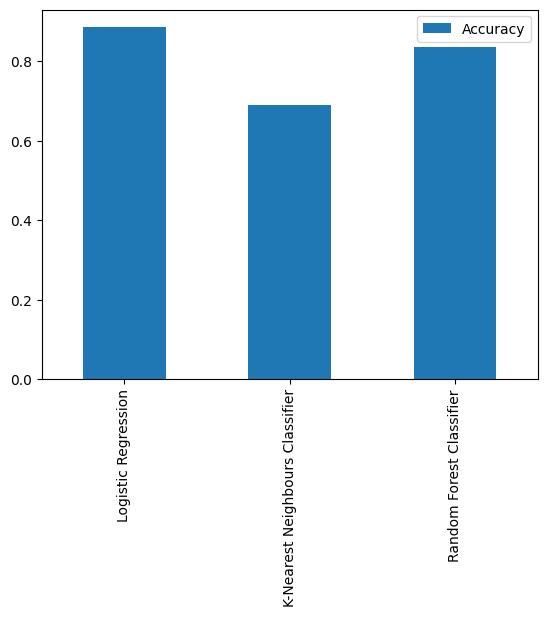

In [26]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar();

Now we got baseline model.. and first prediction aren't always great..trying to improve our model

Lets look following : 
* Hyperparameter Tuning
* Feature importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under the Curve (AUC)

### Hyperparameter Tuning by hand

In [27]:
# Tune KNN
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for each in neighbors:
    knn.set_params(n_neighbors=each)

    # fit the algoritham
    knn.fit(x_train, y_train)

    # update the training scores list
    train_scores.append(knn.score(x_train, y_train))

    # update the test score list
    test_scores.append(knn.score(x_test, y_test))
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on test data 75.41 %


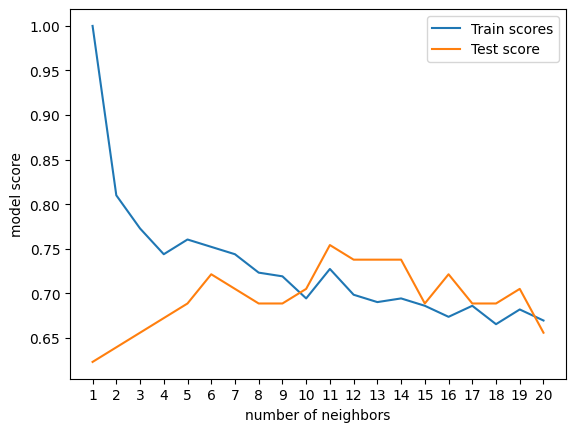

In [29]:
plt.plot(neighbors, train_scores,label='Train scores')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1,21))
plt.xlabel('number of neighbors')
plt.ylabel('model score')
plt.legend()

print('Maximum KNN score on test data',round(max(test_scores)*100,2),'%')

### Hyperparameter Tuning With RandomizedSearchCV

going to Tune :
* LogisticRegression()
* RandomForestClassifier()
 
 using RandomizedSearchCV

In [30]:
# Create hyperparameter grid for LogisticRegression
log_reg_grid = {'C' : np.logspace(-4,4,20),
                'solver' : ['liblinear']}

# create hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators' : np.arange(10,1000,50),
           'max_depth' : [None, 3, 5, 10],
           'min_samples_split' : np.arange(2,20,2),
           'min_samples_leaf' : np.arange(1,20,2)}

Tuning Hyperparameter grid using RandomizedSearchCV

In [31]:
# Tune LogisticRegression

np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# fit random hyperparamter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)
                                

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
# checking best hyperparamter
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
# Evaluate / Review  the Randomized search LogisticRegression model ( is it improve or not ?) 
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [34]:
# Tune RandomForestClassifier

np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv=5,
                           n_iter = 20,
                           verbose=True)

# fit random hyperparameter search for RandomForestClassifer
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
# checking best hyperparamter
rs_rf.best_params_  

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
# Evaluate / Review  the Randomized search RandomForestClassifier model ( is it improve or not ?) 
rs_rf.score(x_test, y_test)

0.8688524590163934

### Hyperparameter Tuning with GridSearchCV
improving LogisticRegression Model coz its provides best score 

In [37]:
# Different hyperparameter for our LogisticRegression model
log_reg_grid = {'C' : np.logspace(-4,4,30),
                'solver' : ['liblinear']}

# setup grid  hyperparameter search LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv=5,
                          verbose=True)

# fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

### Evaluating Tuned Machine Learning Classifier, Beyond Accuracy
* ROC Curve And AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

To make comparison and evalute model first lets make predictions

In [40]:
# Make Predictions With Tuned Model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [41]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

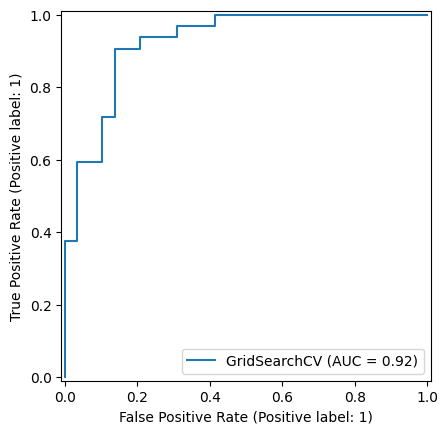

In [42]:
# Plot ROC Curve And Calculate AUC Metric
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=x_test,
                               y=y_test);

In [43]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


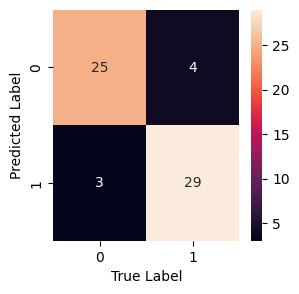

In [44]:
# plots a confusion matrix using seaborn heatmap()

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=True)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
plot_conf_mat(y_test, y_preds)
    

Lets Get Classification Report As Well as cross-validation precision, recall and f1 score

In [45]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation metrics using cross validation

Calculate :
* Accuracy
* Precison
* recall
* F1 score
  
using cross_val_score()

In [46]:
# check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
# create new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')


In [48]:
# Cross Validation Accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc = cv_acc.mean()
cv_acc

0.8479781420765027

In [49]:
# Cross Validation Precison
cv_precision = cross_val_score(clf,
                               x,
                               y,
                               cv=5,
                               scoring='precision')
cv_precision = cv_precision.mean()
cv_precision

0.8215873015873015

In [50]:
# Cross-validation recall
cv_recall = cross_val_score(clf,
                            x,
                            y,
                            cv=5,
                            scoring='recall')
cv_recall = cv_recall.mean()
cv_recall

0.9272727272727274

In [51]:
# cross-validation F1 score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1 = cv_f1.mean()
cv_f1

0.8705403543192143

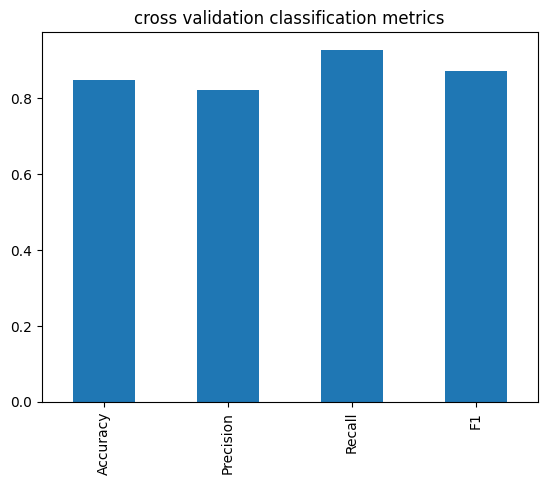

In [52]:
# visualize cross-validation metrics
cv_metrics = pd.DataFrame({'Accuracy' : cv_acc,
                           'Precision' : cv_precision,
                           'Recall' : cv_recall,
                           'F1' : cv_f1},
                         index = [0])

cv_metrics.T.plot.bar(title = 'cross validation classification metrics', 
                      legend = False);

### Feature Importance
Which features contributed most to the outcomes of the model and how did they contribute ?
Finding the feature importance of LogisticRegression Model

In [53]:
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')
clf.fit(x_train, y_train)


LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [54]:
# Check corelation coefficiant
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [55]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

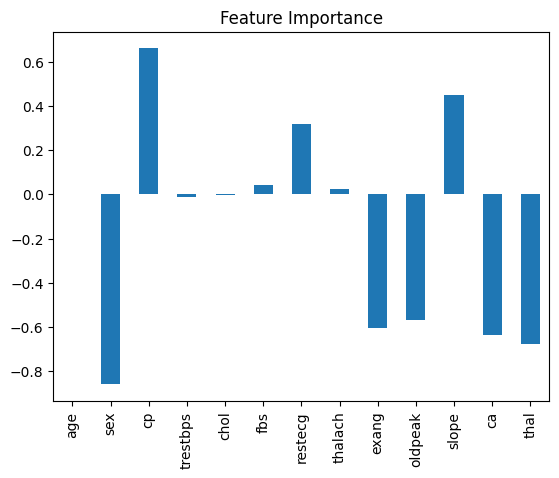

In [56]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = 'Feature Importance',legend = False);
# if feature value increases (positive corelation) the target value also increase, And if feature value is negative (it means negative corelation) is increases the target value decreases

### Saving And Loading Trained Machine Learning Model

In [102]:
import pickle
pickle.dump(gs_log_reg, open('Models/Heart_Disease_Classification_Project_Model.pkl','wb'))

In [103]:
# Loading Saved Model
loaded_pickle_model = pickle.load(open('Models/Heart_Disease_Classification_Project_Model.pkl','rb'))

In [104]:
# Making some Predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)


In [105]:
print(classification_report(y_test, pickle_y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

